In [26]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
url="https://raw.githubusercontent.com/CelesteTN17/Fraud-Detection-Health-Care/main/fraud1.csv"

In [60]:
df=pd.read_csv(url) 

In [61]:
df=df.drop('Unnamed: 0', axis=1)

In [62]:
df['index'] = df['index'].astype(object)
df['National Provider Identifier'] = df['National Provider Identifier'].astype(object)
df['Zip Code of the Provider'] = df['Zip Code of the Provider'].astype(object)

In [63]:
cols=["Gender of the Provider","Entity Type of the Provider","Country Code of the Provider","State Code of the Provider","Place of Service","Medicare Participation Indicator","Place of Service","HCPCS Drug Indicator"]
for col in cols:
    df[col]=df[col].astype("category")

In [64]:
df.head(2)

index  ... Average Medicare Standardized Amount
0  8774979  ...                           160.908889
1  3354385  ...                           135.315257

[2 rows x 27 columns]

In [24]:
df['Country Code of the Provider'].nunique()

4

In [65]:
df.describe()

Number of Services  ...  Average Medicare Standardized Amount
count       100000.000000  ...                         100000.000000
mean           239.671070  ...                             78.030693
std           2493.185998  ...                            200.045458
min             11.000000  ...                              0.008679
25%             21.000000  ...                             20.121849
50%             43.000000  ...                             47.841094
75%            118.000000  ...                             84.879560
max         282739.000000  ...                          16957.148000

[8 rows x 7 columns]

In [ ]:
#df[df['Number of Services'] >600]

In [ ]:
df["Country Code of the Provider"].value_counts()

US    99994
DE        3
JP        2
TR        1
Name: Country Code of the Provider, dtype: int64

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype   
---  ------                                                    --------------   -----   
 0   index                                                     100000 non-null  object  
 1   National Provider Identifier                              100000 non-null  object  
 2   Last Name/Organization Name of the Provider               100000 non-null  object  
 3   First Name of the Provider                                95745 non-null   object  
 4   Middle Initial of the Provider                            70669 non-null   object  
 5   Credentials of the Provider                               92791 non-null   object  
 6   Gender of the Provider                                    95746 non-null   category
 7   Entity Type of the Provider                               100000 non-null  category


# DISTRIBUTION OF DATA

In [14]:
import scipy
from scipy import stats

dist_names = ['weibull_min','norm','weibull_max','beta','invgauss','uniform','gamma','expon','lognorm','pearson3','triang']
y_std=df[['Average Medicare Allowed Amount']]
chi_square_statistics = []
# 11 equi-distant bins of observed Data 
percentile_bins = np.linspace(0,100,11)
percentile_cutoffs = np.percentile(y_std, percentile_bins)
observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
cum_observed_frequency = np.cumsum(observed_frequency)

# Loop through candidate distributions
for distribution in dist_names:
    # Set up distribution and get fitted distribution parameters
    dist = getattr(scipy.stats, distribution)
    param = dist.fit(y_std)
    print("{}\n{}\n".format(dist, param))


    # Get expected counts in percentile bins
    # cdf of fitted sistrinution across bins
    cdf_fitted = dist.cdf(percentile_cutoffs, *param)
    expected_frequency = []
    for bin in range(len(percentile_bins)-1):
        expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
        expected_frequency.append(expected_cdf_area)

    # Chi-square Statistics
    expected_frequency = np.array(expected_frequency) * size
    cum_expected_frequency = np.cumsum(expected_frequency)
    ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
    chi_square_statistics.append(ss)


#Sort by minimum ch-square statistics
results = pd.DataFrame()
results['Distribution'] = dist_names
results['chi_square'] = chi_square_statistics
results.sort_values(['chi_square'], inplace=True)


print ('\nDistributions listed by Betterment of fit:')
print ('............................................')
print (results)


ValueError: ignored

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f34e4ed90>]],
      dtype=object)

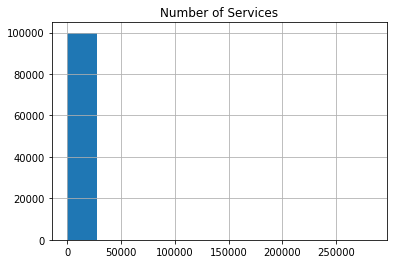

In [66]:
df.hist("Number of Services")

# DATA VISUALIZATION


## Number of Services

In [ ]:
df[df['Number of Services'] <118].shape

(74994, 27)

{'boxes': [<matplotlib.lines.Line2D at 0x7f1470fa5c50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1470faccd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1470fb3d10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1470fb37d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1470fac250>,
  <matplotlib.lines.Line2D at 0x7f1470fac790>]}

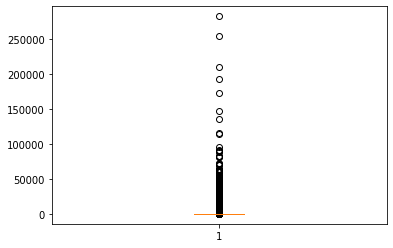

In [ ]:
plt.boxplot(df['Number of Services'])


{'boxes': [<matplotlib.lines.Line2D at 0x7f1470f17890>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1470f1c910>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1470f22950>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1470f22410>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1470f17e50>,
  <matplotlib.lines.Line2D at 0x7f1470f1c3d0>]}

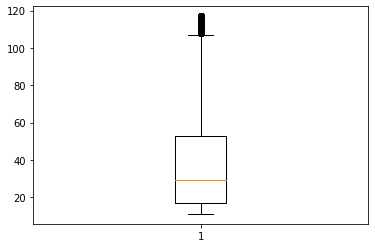

In [ ]:
plt.boxplot(df[df['Number of Services']<118]["Number of Services"])

In [ ]:
df[df['Number of Services'] <118].describe()

Number of Services  ...  Average Medicare Standardized Amount
count        74994.000000  ...                          74994.000000
mean            38.802958  ...                             84.898354
std             26.961433  ...                            214.028482
min             11.000000  ...                              0.008679
25%             17.000000  ...                             21.403595
50%             29.000000  ...                             49.199366
75%             53.000000  ...                             92.804655
max            117.000000  ...                          16957.148000

[8 rows x 7 columns]

(array([26502., 14666.,  8625.,  6663.,  4654.,  3933.,  3200.,  2453.,
         2379.,  1919.]),
 array([ 11. ,  21.6,  32.2,  42.8,  53.4,  64. ,  74.6,  85.2,  95.8,
        106.4, 117. ]),
 <a list of 10 Patch objects>)

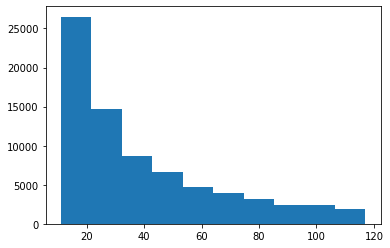

In [ ]:
plt.hist(df[df['Number of Services'] <118]['Number of Services'])

## Number of Medicare Beneficiaries

{'boxes': [<matplotlib.lines.Line2D at 0x7f1470d4f9d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1470d51a90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1470d5aad0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1470d5a590>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1470d4ffd0>,
  <matplotlib.lines.Line2D at 0x7f1470d51550>]}

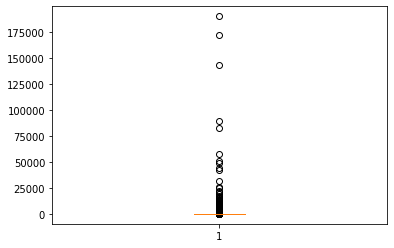

In [ ]:
plt.boxplot(df['Number of Medicare Beneficiaries'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f1470fe41d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1470fac9d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1470f6b7d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1470feba90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1471075410>,
  <matplotlib.lines.Line2D at 0x7f1470f81410>]}

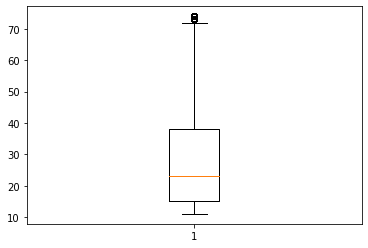

In [ ]:
plt.boxplot(df[df['Number of Medicare Beneficiaries'] <75]['Number of Medicare Beneficiaries'])

(array([39744., 16569.,  9530.,  6291.,  4238.,  3532.,  2858.,  2252.,
         1735.,  1570.]),
 array([ 11. ,  24.8,  38.6,  52.4,  66.2,  80. ,  93.8, 107.6, 121.4,
        135.2, 149. ]),
 <a list of 10 Patch objects>)

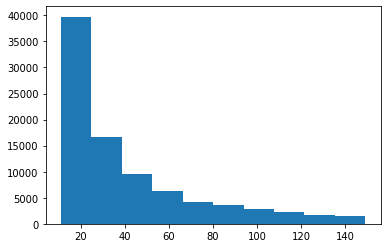

In [ ]:
plt.hist(df[df['Number of Medicare Beneficiaries'] <150]['Number of Medicare Beneficiaries'])

In [ ]:
df[df['Number of Medicare Beneficiaries'] <1500].describe()

Number of Services  ...  Average Medicare Standardized Amount
count        99782.000000  ...                          99782.000000
mean           205.619581  ...                             78.114782
std           1723.968372  ...                            200.234945
min             11.000000  ...                              0.008679
25%             21.000000  ...                             20.189375
50%             43.000000  ...                             47.890944
75%            117.000000  ...                             84.951176
max         209960.000000  ...                          16957.148000

[8 rows x 7 columns]

## Number of Distinct Medicare Beneficiary/Per Day Services

{'boxes': [<matplotlib.lines.Line2D at 0x7f1470b10c50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1470b18cd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1470b1fd10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1470b1f7d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1470b18250>,
  <matplotlib.lines.Line2D at 0x7f1470b18790>]}

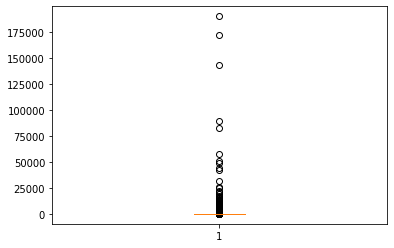

In [ ]:
plt.boxplot(df['Number of Medicare Beneficiaries'] )

{'boxes': [<matplotlib.lines.Line2D at 0x7f1470c23250>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1470c28310>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1470c31350>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1470c28dd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1470c23850>,
  <matplotlib.lines.Line2D at 0x7f1470c23d90>]}

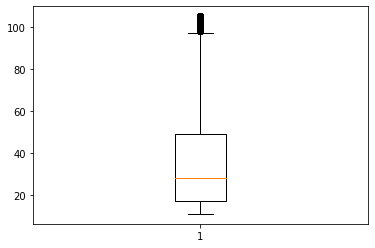

In [ ]:
plt.boxplot(df[df['Number of Distinct Medicare Beneficiary/Per Day Services'] <106]['Number of Distinct Medicare Beneficiary/Per Day Services'])

(array([26041., 13440.,  9957.,  6185.,  4836.,  4230.,  3052.,  2865.,
         2188.,  2137.]),
 array([ 11. ,  20.4,  29.8,  39.2,  48.6,  58. ,  67.4,  76.8,  86.2,
         95.6, 105. ]),
 <a list of 10 Patch objects>)

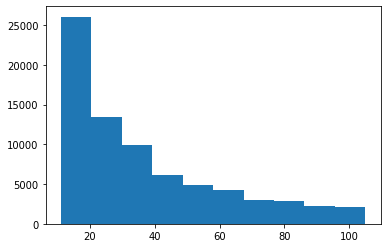

In [ ]:
plt.hist(df[df['Number of Distinct Medicare Beneficiary/Per Day Services'] <106]['Number of Distinct Medicare Beneficiary/Per Day Services'])

In [ ]:
df[df['Number of Distinct Medicare Beneficiary/Per Day Services'] <106].describe()

Number of Services  ...  Average Medicare Standardized Amount
count        74931.000000  ...                          74931.000000
mean            86.310953  ...                             83.960779
std            961.141040  ...                            213.778787
min             11.000000  ...                              0.008679
25%             17.000000  ...                             20.286295
50%             29.000000  ...                             48.120000
75%             53.000000  ...                             91.943055
max          59300.000000  ...                          16957.148000

[8 rows x 7 columns]

## Average Medicare Allowed Amount

{'boxes': [<matplotlib.lines.Line2D at 0x7f1470a87cd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1470a8cd50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1470a93d90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1470a93850>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1470a8c2d0>,
  <matplotlib.lines.Line2D at 0x7f1470a8c810>]}

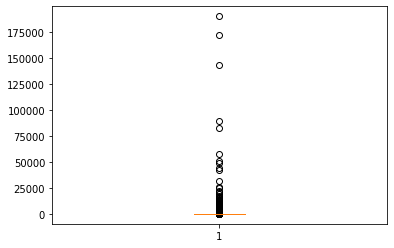

In [ ]:
plt.boxplot(df['Number of Medicare Beneficiaries'] )

{'boxes': [<matplotlib.lines.Line2D at 0x7f1470a7b8d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1470a7f950>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1470a06990>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1470a06450>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1470a7be90>,
  <matplotlib.lines.Line2D at 0x7f1470a7f410>]}

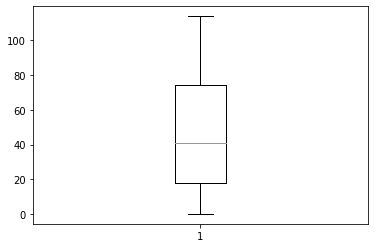

In [ ]:
plt.boxplot(df[df['Average Medicare Allowed Amount'] <114]['Average Medicare Allowed Amount'])

(array([13166.,  9906.,  9921.,  7506.,  5513.,  5665.,  8410.,  4722.,
         4648.,  5871.]),
 array([1.00000000e-02, 1.14070156e+01, 2.28040312e+01, 3.42010469e+01,
        4.55980625e+01, 5.69950781e+01, 6.83920938e+01, 7.97891094e+01,
        9.11861250e+01, 1.02583141e+02, 1.13980156e+02]),
 <a list of 10 Patch objects>)

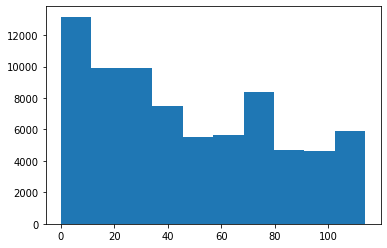

In [ ]:
plt.hist(df[df['Average Medicare Allowed Amount'] <114]['Average Medicare Allowed Amount'])

In [ ]:
df[df['Average Medicare Allowed Amount'] <114].describe()

Number of Services  ...  Average Medicare Standardized Amount
count        75328.000000  ...                          75328.000000
mean           289.273577  ...                             36.187458
std           2865.209784  ...                             25.283682
min             11.000000  ...                              0.008679
25%             22.000000  ...                             14.425667
50%             48.000000  ...                             30.828571
75%            136.000000  ...                             55.681770
max         282739.000000  ...                            130.026047

[8 rows x 7 columns]

## Average Medicare Submitted Charge Amount

In [ ]:
plt.boxplot(df[df['Number of Medicare Beneficiaries'] 

In [ ]:
plt.boxplot(df[df['Average Submitted Charge Amount'] <300]['Average Submitted Charge Amount'])

(array([12201., 14097.,  8983.,  8213.,  7180.,  7047.,  5938.,  4633.,
         3890.,  2898.]),
 array([1.00000000e-02, 3.00077531e+01, 6.00055062e+01, 9.00032594e+01,
        1.20001012e+02, 1.49998766e+02, 1.79996519e+02, 2.09994272e+02,
        2.39992025e+02, 2.69989778e+02, 2.99987531e+02]),
 <a list of 10 Patch objects>)

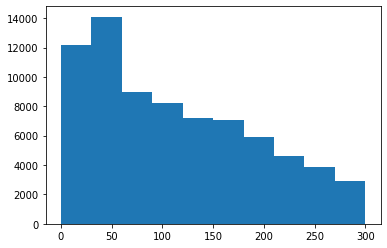

In [ ]:
plt.hist(df[df['Average Submitted Charge Amount'] <300]['Average Submitted Charge Amount'])

In [ ]:
df[df['Average Submitted Charge Amount'] <290].describe()

Number of Services  ...  Average Medicare Standardized Amount
count        74232.000000  ...                          74232.000000
mean           293.236152  ...                             40.423797
std           2885.993799  ...                             33.839324
min             11.000000  ...                              0.008679
25%             22.000000  ...                             14.251035
50%             49.000000  ...                             30.882839
75%            139.000000  ...                             57.400000
max         282739.000000  ...                            229.551364

[8 rows x 7 columns]

## Average Medicare Payment Amount

In [ ]:
plt.boxplot(df[df['Number of Medicare Beneficiaries'] 

In [ ]:
plt.boxplot(df[df['Average Medicare Payment Amount'] <85]['Average Medicare Payment Amount'])

(array([12158.,  9551., 11088.,  7532.,  5947.,  7377.,  7187.,  5033.,
         4636.,  4551.]),
 array([8.67924530e-03, 8.50739027e+00, 1.70061013e+01, 2.55048123e+01,
        3.40035233e+01, 4.25022344e+01, 5.10009454e+01, 5.94996564e+01,
        6.79983674e+01, 7.64970785e+01, 8.49957895e+01]),
 <a list of 10 Patch objects>)

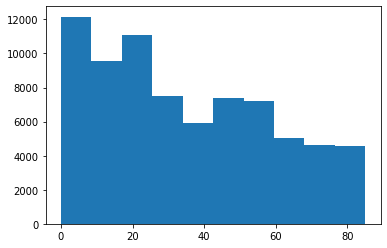

In [ ]:
plt.hist(df[df['Average Medicare Payment Amount'] <85]['Average Medicare Payment Amount'])

In [ ]:
df[df['Average Medicare Payment Amount'] <85].describe()

Number of Services  ...  Average Medicare Standardized Amount
count        75060.000000  ...                          75060.000000
mean           291.272315  ...                             35.692467
std           2870.310655  ...                             24.475588
min             11.000000  ...                              0.008679
25%             22.000000  ...                             14.394653
50%             49.000000  ...                             30.670000
75%            138.000000  ...                             55.399491
max         282739.000000  ...                            130.026047

[8 rows x 7 columns]

## Average Medicare Standardized Amount

In [ ]:
plt.boxplot(df[df['Number of Medicare Beneficiaries'] 

In [ ]:
plt.boxplot(df[df['Average Medicare Standardized Amount'] <85]['Average Medicare Standardized Amount'])

(array([11921.,  8919., 12011.,  7358.,  5503.,  7300.,  8032.,  4054.,
         4582.,  5388.]),
 array([8.67924530e-03, 8.50676587e+00, 1.70048525e+01, 2.55029391e+01,
        3.40010257e+01, 4.24991124e+01, 5.09971990e+01, 5.94952856e+01,
        6.79933722e+01, 7.64914588e+01, 8.49895455e+01]),
 <a list of 10 Patch objects>)

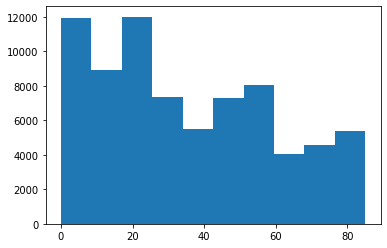

In [ ]:
plt.hist(df[df['Average Medicare Standardized Amount'] <85]['Average Medicare Standardized Amount'])

In [ ]:
df[df['Average Medicare Standardized Amount'] <85].describe()

Number of Services  ...  Average Medicare Standardized Amount
count        75068.000000  ...                          75068.000000
mean           292.609421  ...                             35.560966
std           2870.226469  ...                             24.203873
min             11.000000  ...                              0.008679
25%             22.000000  ...                             14.396958
50%             49.000000  ...                             30.670000
75%            140.000000  ...                             55.400512
max         282739.000000  ...                             84.989545

[8 rows x 7 columns]

## CREATING NEW DATAFRAME BY REMOVING EXTREME OUTLIERS

In [87]:
df1= df[(df['Average Submitted Charge Amount'] <600) & (df["Number of Services"]< 400)]

In [221]:
df1.describe()

Number_of_Services  ...  Av_medicare_standardized_Amt
count        80522.000000  ...                  80522.000000
mean             0.161792  ...                      0.098415
std              0.207697  ...                      0.084097
min              0.000000  ...                      0.000000
25%              0.023196  ...                      0.035301
50%              0.074742  ...                      0.079432
75%              0.211340  ...                      0.140415
max              1.000000  ...                      1.000000

[8 rows x 7 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f337a27d0>,
      dtype=object)

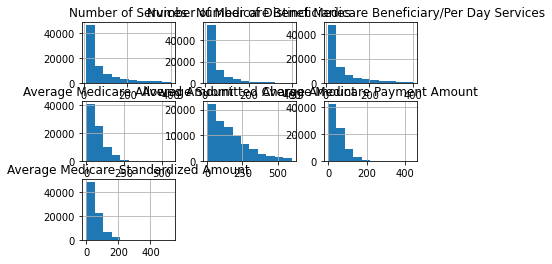

In [69]:
df1.hist()

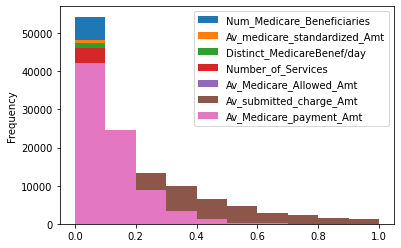

In [238]:
df1[['Num_Medicare_Beneficiaries','Av_medicare_standardized_Amt','Distinct_MedicareBenef/day','Number_of_Services',"Av_Medicare_payment_Amt","Av_Medicare_Allowed_Amt","Av_submitted_charge_Amt"]].plot.hist()

## RENAMING DATAFRAME COLUMNS




In [96]:
df1.columns=['index','NIP','LastName_Provider','FirstName_Provider','MidInit_Provider','Credentials_Pr', 'Gender_Pr','EntityType_Pr','StreetAddress1','StreetAddress2','City_Provider',
             'ZipCode_Pr', "StateCode_Pr", 'CountryCode_Pr','ProviderType','Medicare_Participation_Indicator','Place_of_Service',
             'HCPCS_Code','HCPCS_Description','HCPCS_Drug_Indicator','Number_of_Services','Num_Medicare_Beneficiaries', 
             'Distinct_MedicareBenef/day','Av_Medicare_Allowed_Amt','Av_submitted_charge_Amt','Av_Medicare_payment_Amt','Av_medicare_standardized_Amt']

In [97]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80522 entries, 0 to 99998
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   index                             80522 non-null  object  
 1   NIP                               80522 non-null  object  
 2   LastName_Provider                 80522 non-null  object  
 3   FirstName_Provider                77620 non-null  object  
 4   MidInit_Provider                  57394 non-null  object  
 5   Credentials_Pr                    75243 non-null  object  
 6   Gender_Pr                         77621 non-null  category
 7   EntityType_Pr                     80522 non-null  category
 8   StreetAddress1                    80522 non-null  object  
 9   StreetAddress2                    32379 non-null  object  
 10  City_Provider                     80522 non-null  object  
 11  ZipCode_Pr                        80522 non-null  obje

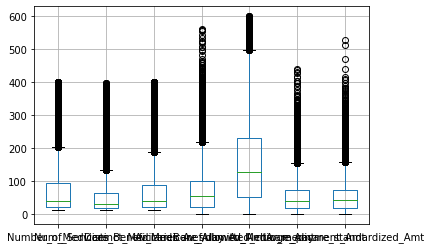

In [33]:
df1.boxplot()

# NORMALIZATION OF NEW DATAFRAME


In [111]:
from sklearn.preprocessing import MinMaxScaler
cols_to_norm = ['Number_of_Services','Num_Medicare_Beneficiaries','Distinct_MedicareBenef/day','Av_Medicare_Allowed_Amt','Av_submitted_charge_Amt','Av_Medicare_payment_Amt','Av_medicare_standardized_Amt']
df1[cols_to_norm] = MinMaxScaler().fit_transform(df1[cols_to_norm])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [112]:
df1

index  ... Av_medicare_standardized_Amt
0      8774979  ...                     0.305588
1      3354385  ...                     0.256980
2      3001884  ...                     0.115070
3      7594822  ...                     0.006498
4       746159  ...                     0.036178
...        ...  ...                          ...
99994  9274361  ...                     0.089276
99995  3837311  ...                     0.118208
99996  2079360  ...                     0.070332
99997  8927965  ...                     0.027750
99998  8854571  ...                     0.048072

[80522 rows x 27 columns]

In [ ]:
#df["Provider Type"]= df["Provider Type"].astype("category")

In [ ]:
#data_crosstab = pd.crosstab(df['Provider Type'], 
                           # df['Medicare Participation Indicator'],
                            #    margins = False)
#print(data_crosstab)

In [113]:
df_new=df1.copy()

# Plotting categorical variables

In [115]:
df_new['HCPCS_Drug_Indicator'].value_counts()

N    75466
Y     5056
Name: HCPCS_Drug_Indicator, dtype: int64

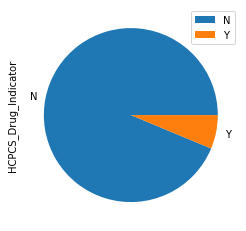

N    75466
Y     5056
Name: HCPCS_Drug_Indicator, dtype: int64

In [116]:
df_new['HCPCS_Drug_Indicator'].value_counts().plot.pie()

plt.legend()
plt.show()
df_new['HCPCS_Drug_Indicator'].value_counts()

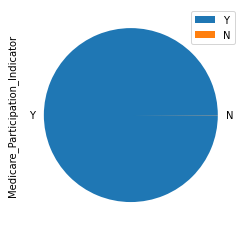

Y    80495
N       27
Name: Medicare_Participation_Indicator, dtype: int64

In [117]:
df_new['Medicare_Participation_Indicator'].value_counts().plot.pie()

plt.legend()
plt.show()
df_new['Medicare_Participation_Indicator'].value_counts()

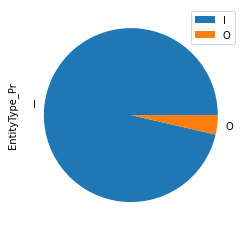

I    77621
O     2901
Name: EntityType_Pr, dtype: int64

In [ ]:
df_new['EntityType_Pr'].value_counts().plot.pie()

plt.legend()
plt.show()
df_new['EntityType_Pr'].value_counts()

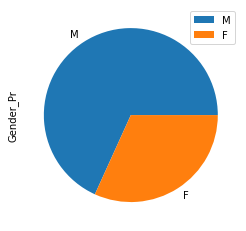

M    52954
F    24667
Name: Gender_Pr, dtype: int64

In [ ]:
df_new['Gender_Pr'].value_counts().plot.pie()

plt.legend()
plt.show() 
df_new['Gender_Pr'].value_counts()

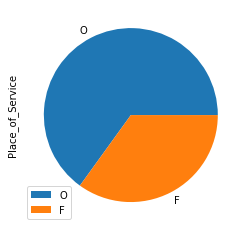

O    52377
F    28145
Name: Place_of_Service, dtype: int64

In [ ]:
df_new['Place_of_Service'].value_counts().plot.pie()

plt.legend()
plt.show() 

df_new['Place_of_Service'].value_counts()

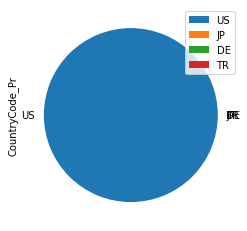

US    80517
JP        2
DE        2
TR        1
Name: CountryCode_Pr, dtype: int64

In [ ]:
df_new['CountryCode_Pr'].value_counts().plot.pie()

plt.legend()
plt.show() 
df_new['CountryCode_Pr'].value_counts()

# PLOTTING EACH CATEGORICAL VARIABLE AGAINST THE OTHER NUMERICAL VARIABLES

In [38]:
import numpy as np
#cat_cols = ["Gender_Pr","EntityType_Pr","CountryCode_Pr","StateCode_Pr","Medicare_Participation_Indicator","Place_of_Service","HCPCS_Drug_Indicator"]
def boxplot ( data , cols , col_x  = 'EntityType_Pr'):
    for col in cols:
        sns.set_style('whitegrid')
        sns.boxplot ( col_x , col, data =data)
        plt.xlabel(col_x)
        plt.ylabel(col)
        plt.show()

In [39]:
num_cols=['Number_of_Services','Num_Medicare_Beneficiaries','Distinct_MedicareBenef/day','Av_Medicare_Allowed_Amt','Av_medicare_standardized_Amt','Av_submitted_charge_Amt','Av_Medicare_payment_Amt']
#boxplot(df_new, num_cols)

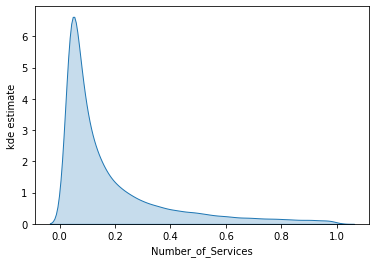

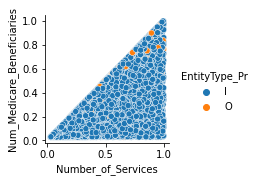

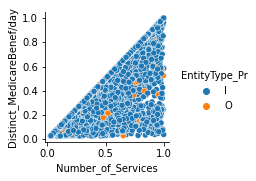

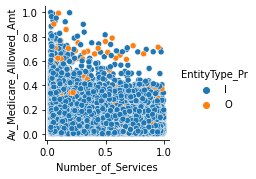

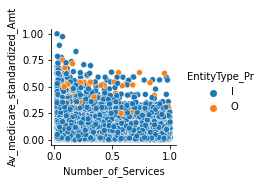

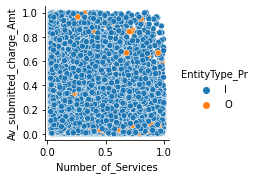

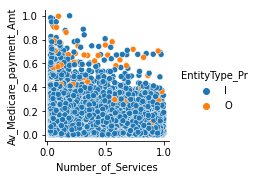

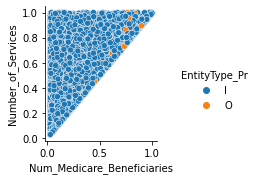

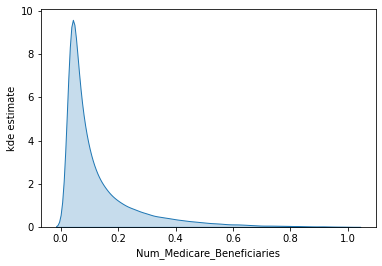

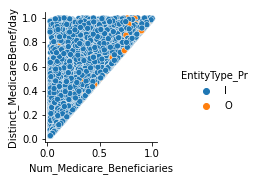

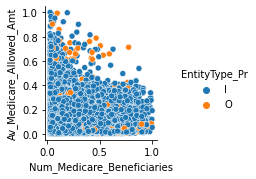

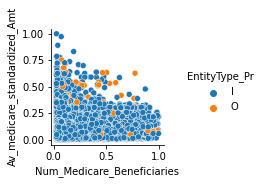

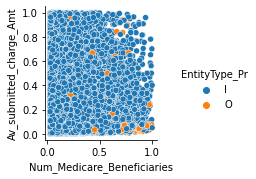

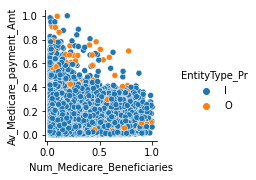

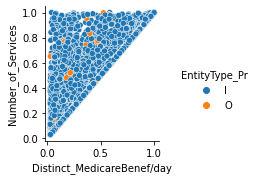

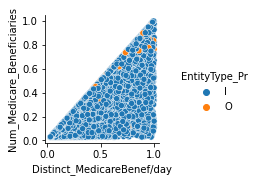

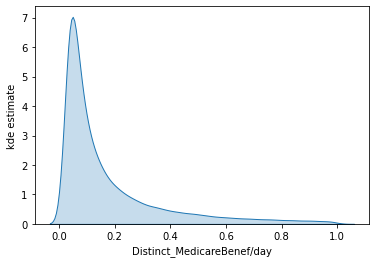

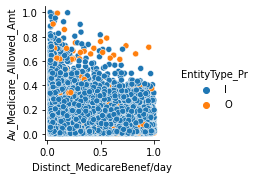

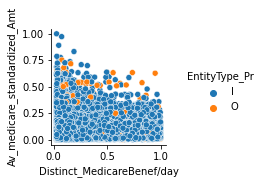

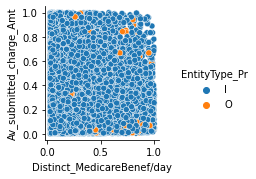

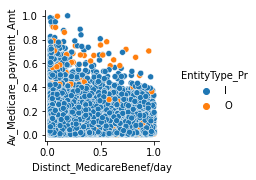

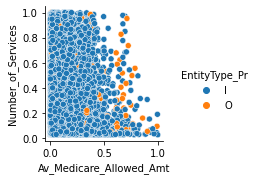

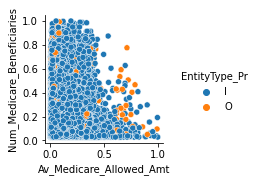

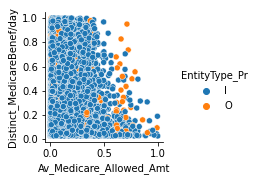

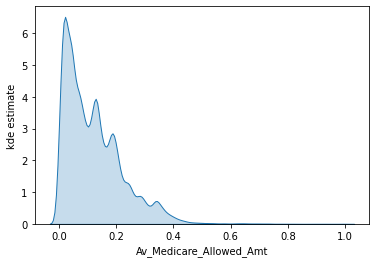

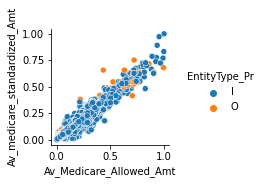

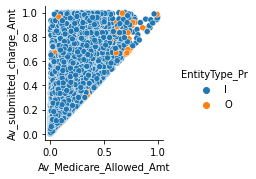

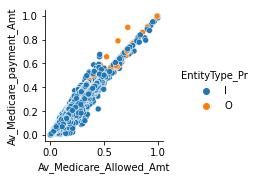

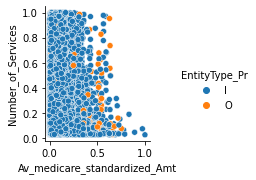

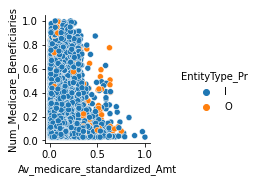

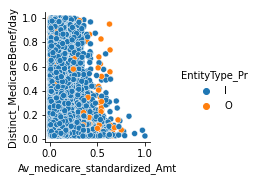

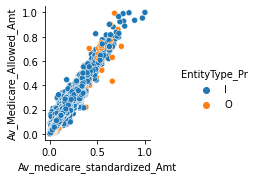

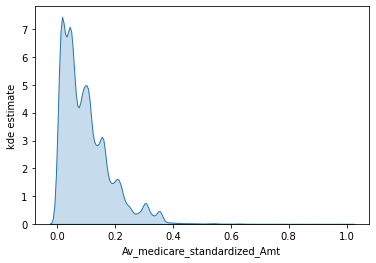

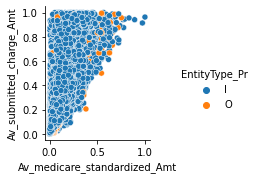

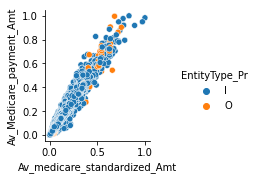

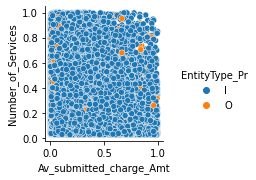

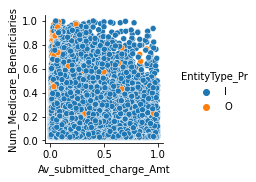

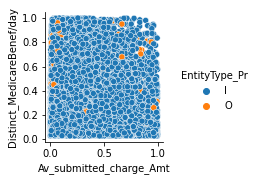

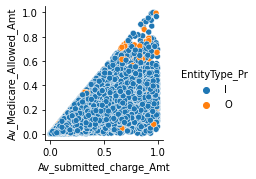

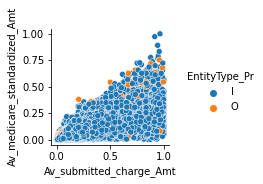

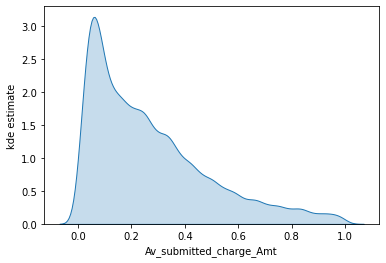

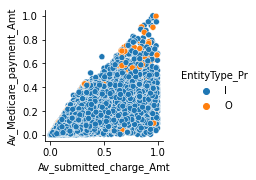

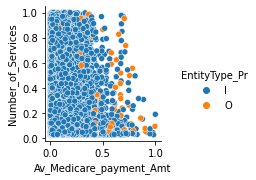

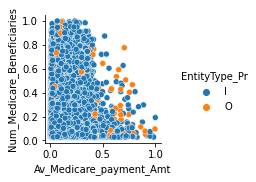

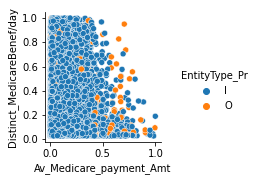

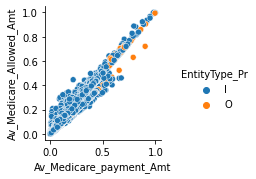

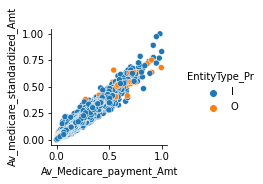

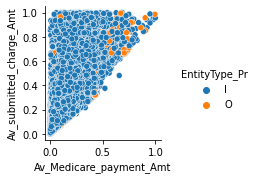

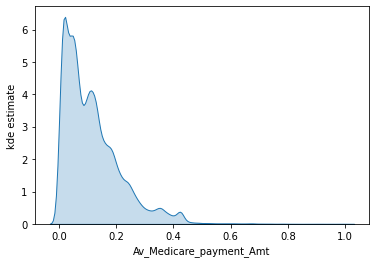

In [40]:
def scatter (data , cols , target= 'EntityType_Pr'):
    for colx in cols:
        for coly in cols:
            if colx == coly:
                sns.kdeplot(data[colx] , shade=True)
                plt.xlabel(colx)
                plt.ylabel('kde estimate')
                plt.show()
            else:
                sns.pairplot(x_vars= colx , y_vars=coly , hue = target , data = data)
                plt.xlabel(colx)
                plt.ylabel(coly)
                plt.show()
scatter(df_new, num_cols)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


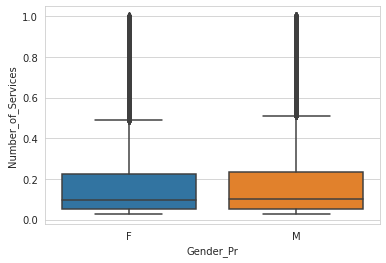

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


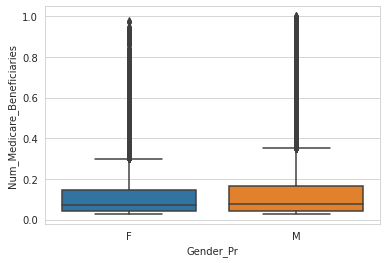

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


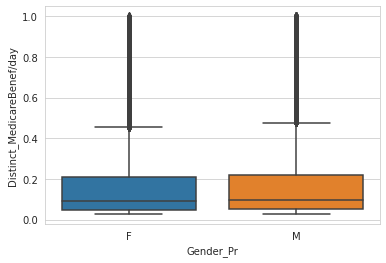

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


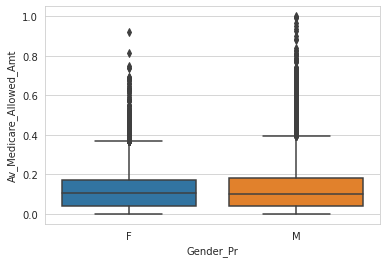

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


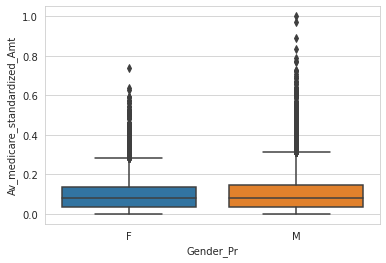

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


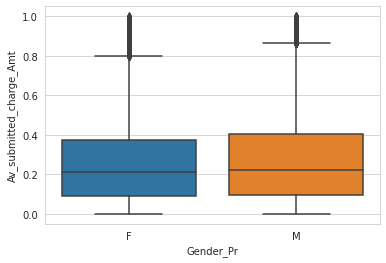

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


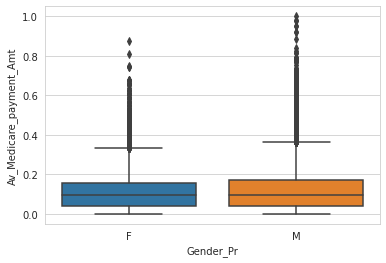

In [41]:
def boxplot ( data , cols , col_x  = 'Gender_Pr'):
    for col in cols:
        sns.set_style('whitegrid')
        sns.boxplot ( col_x , col, data =data)
        plt.xlabel(col_x)
        plt.ylabel(col)
        plt.show()

boxplot(df_new, num_cols)

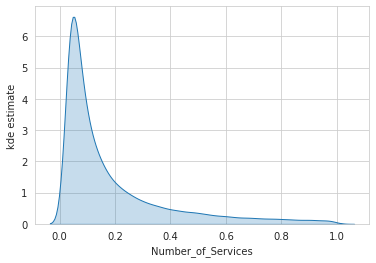

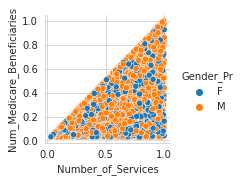

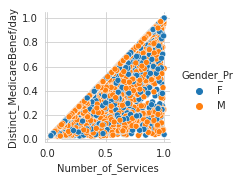

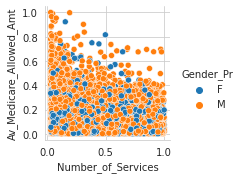

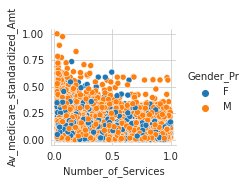

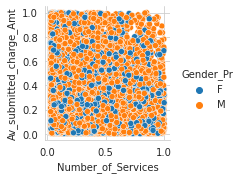

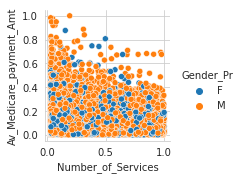

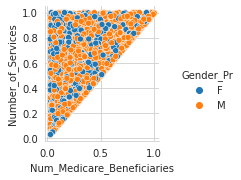

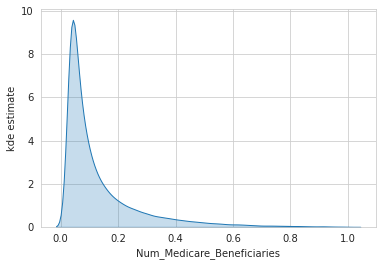

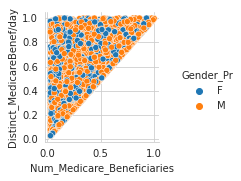

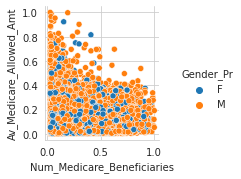

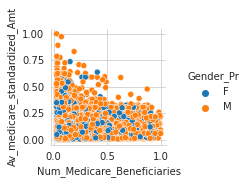

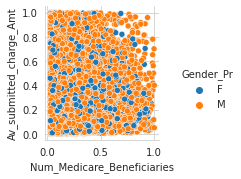

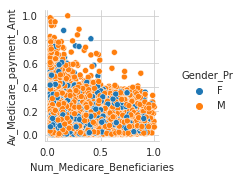

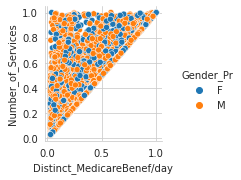

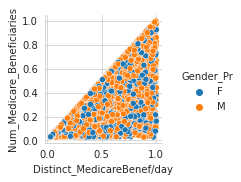

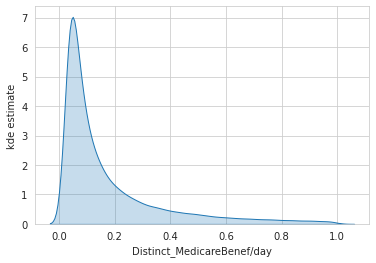

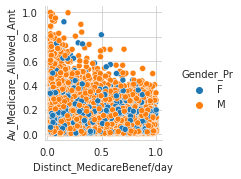

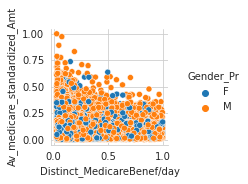

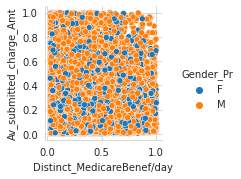

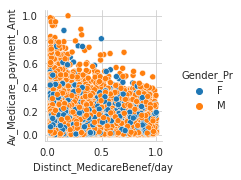

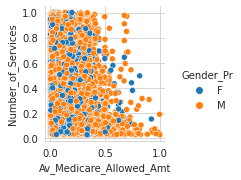

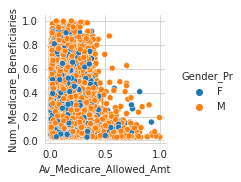

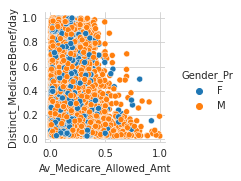

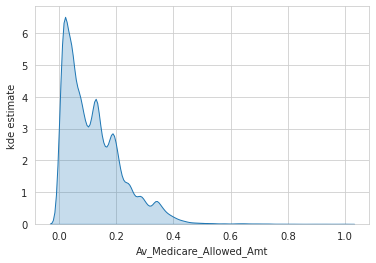

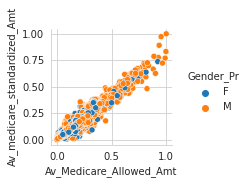

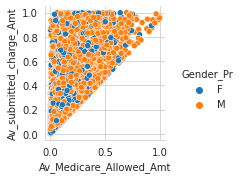

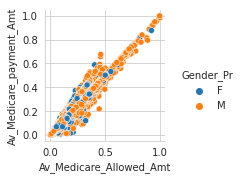

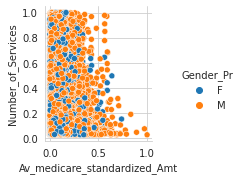

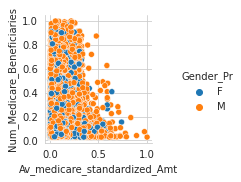

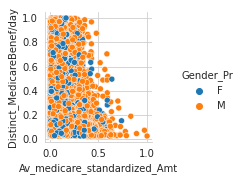

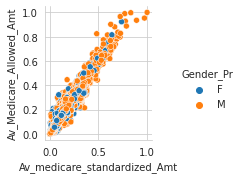

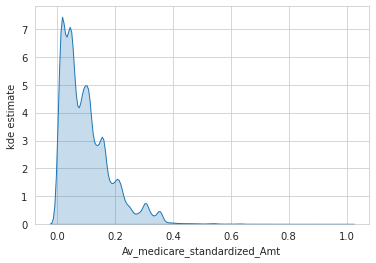

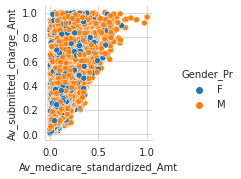

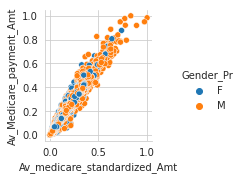

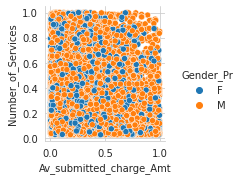

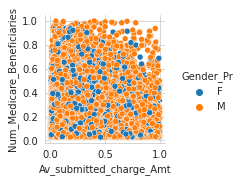

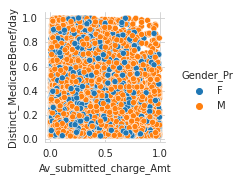

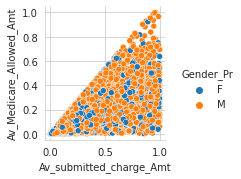

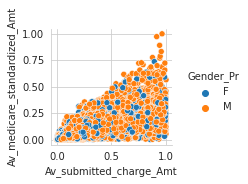

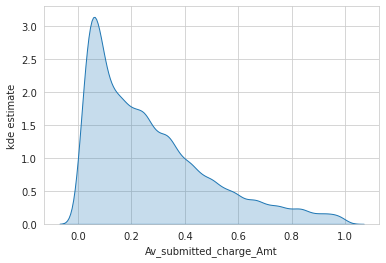

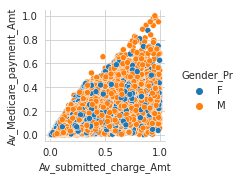

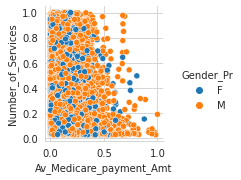

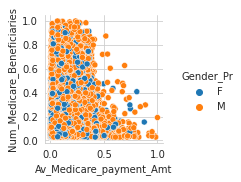

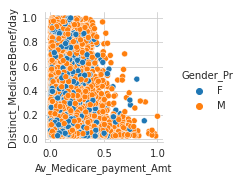

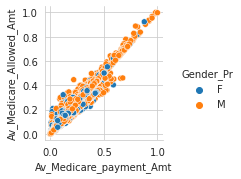

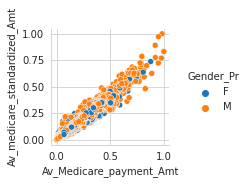

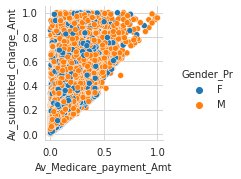

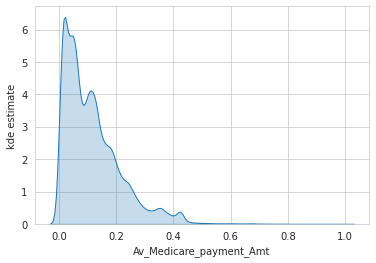

In [42]:
def scatter (data , cols , target= 'Gender_Pr'):
    for colx in cols:
        for coly in cols:
            if colx == coly:
                sns.kdeplot(data[colx] , shade=True)
                plt.xlabel(colx)
                plt.ylabel('kde estimate')
                plt.show()
            else:
                sns.pairplot(x_vars= colx , y_vars=coly , hue = target , data = data)
                plt.xlabel(colx)
                plt.ylabel(coly)
                plt.show()
scatter(df_new, num_cols)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


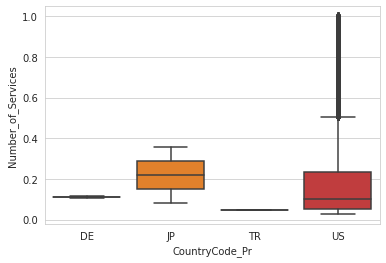

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


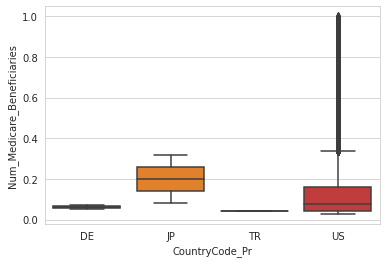

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


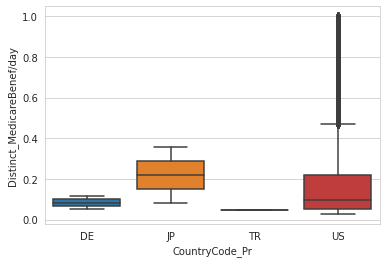

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


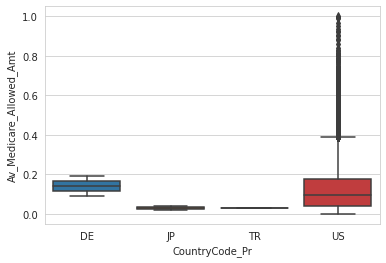

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


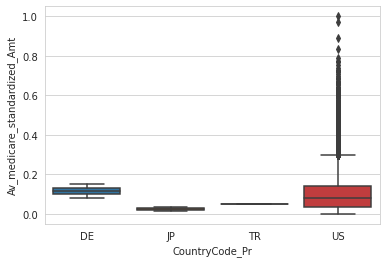

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


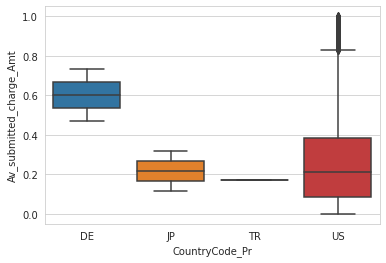

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


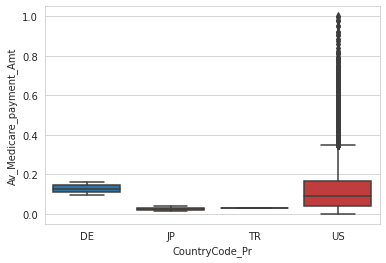

In [43]:
def boxplot ( data , cols , col_x  = 'CountryCode_Pr'):
    for col in cols:
        sns.set_style('whitegrid')
        sns.boxplot ( col_x , col, data =data)
        plt.xlabel(col_x)
        plt.ylabel(col)
        plt.show()

boxplot(df_new, num_cols)

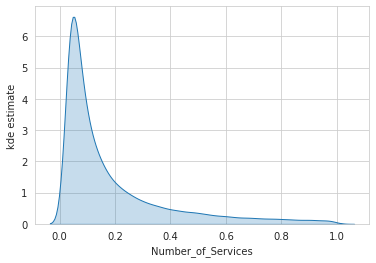

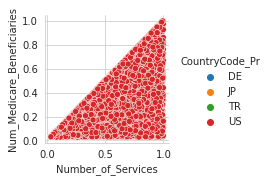

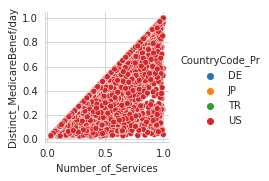

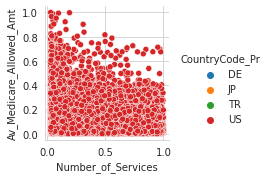

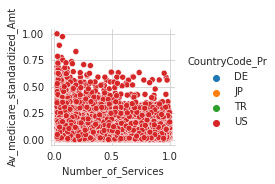

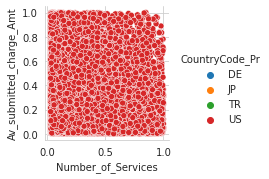

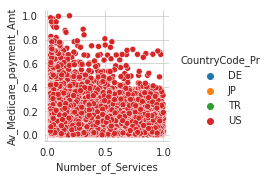

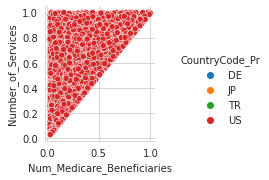

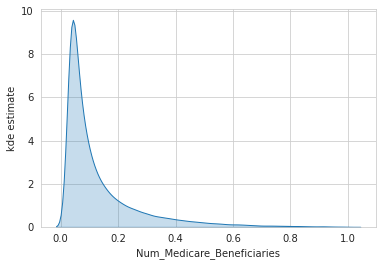

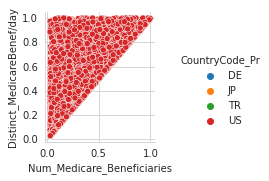

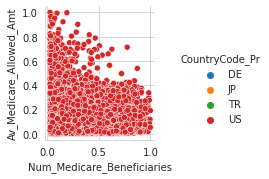

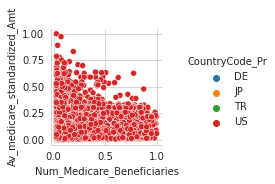

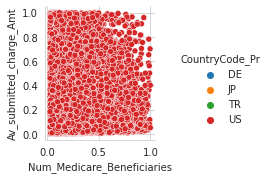

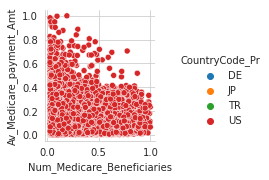

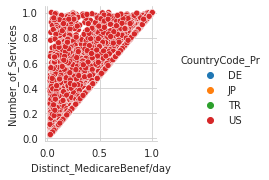

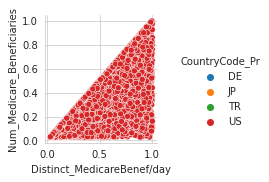

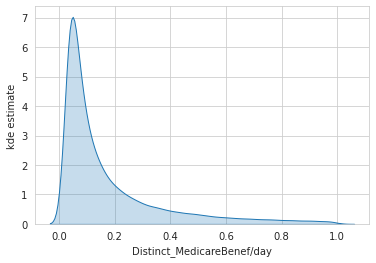

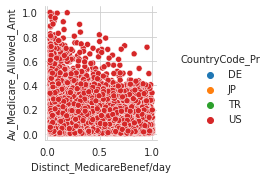

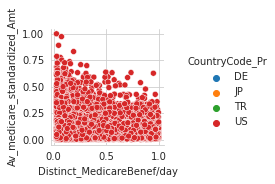

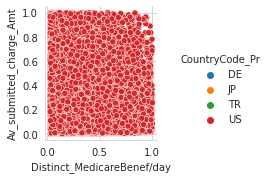

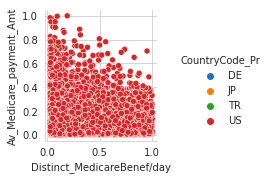

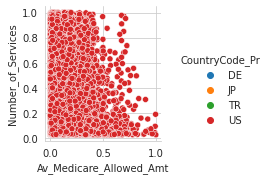

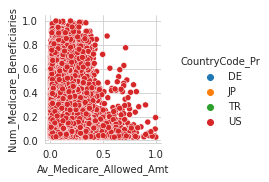

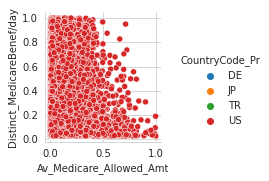

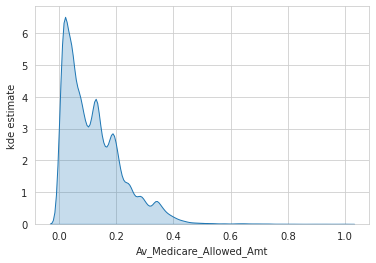

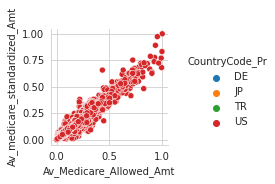

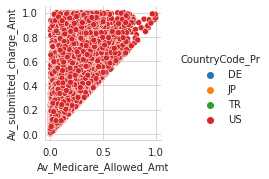

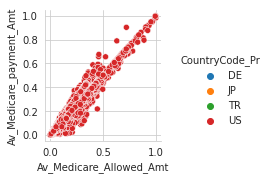

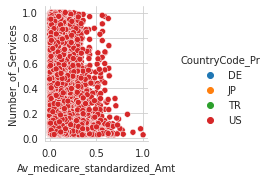

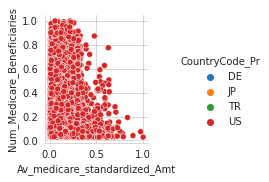

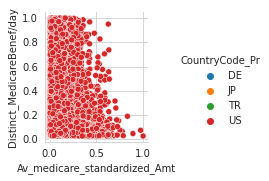

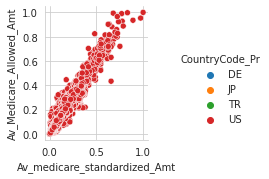

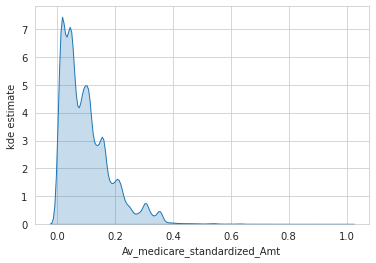

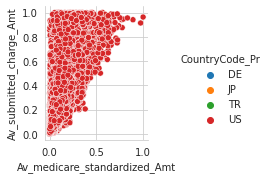

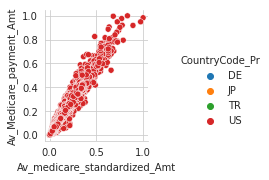

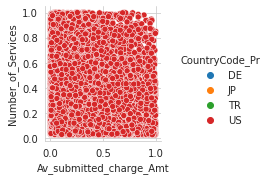

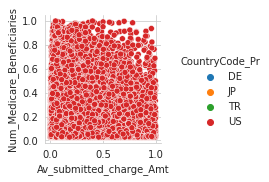

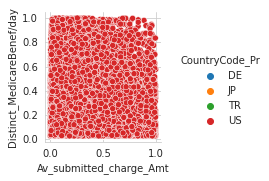

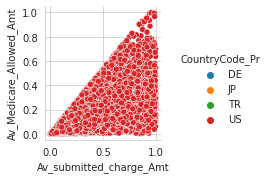

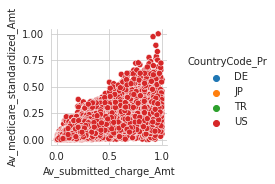

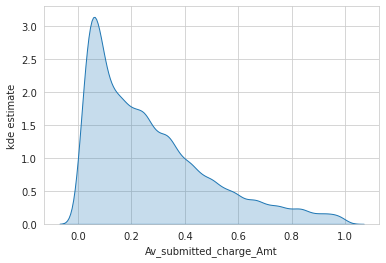

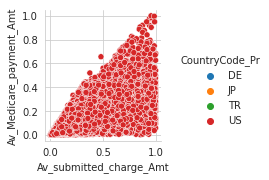

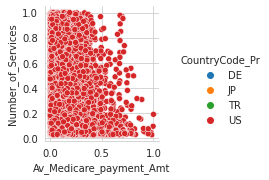

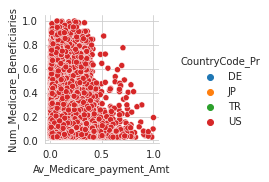

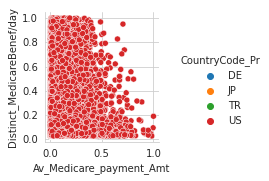

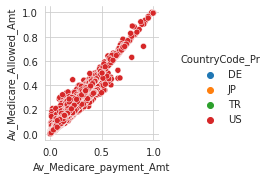

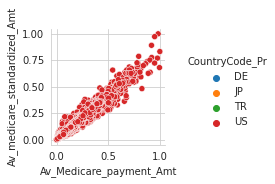

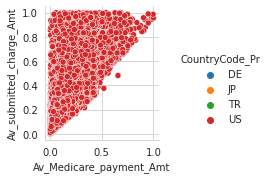

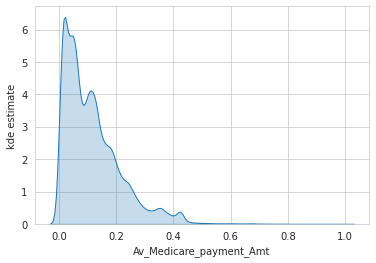

In [44]:
def scatter (data , cols , target= 'CountryCode_Pr'):
    for colx in cols:
        for coly in cols:
            if colx == coly:
                sns.kdeplot(data[colx] , shade=True)
                plt.xlabel(colx)
                plt.ylabel('kde estimate')
                plt.show()
            else:
                sns.pairplot(x_vars= colx , y_vars=coly , hue = target , data = data)
                plt.xlabel(colx)
                plt.ylabel(coly)
                plt.show()
scatter(df_new, num_cols)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


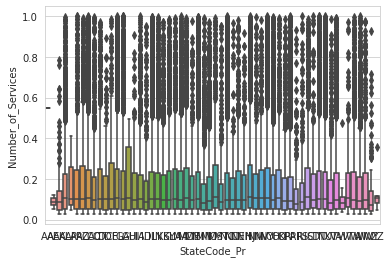

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


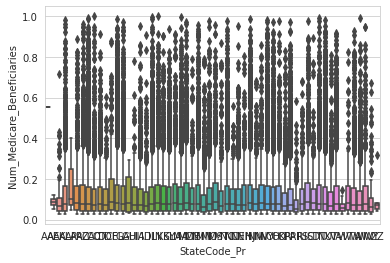

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


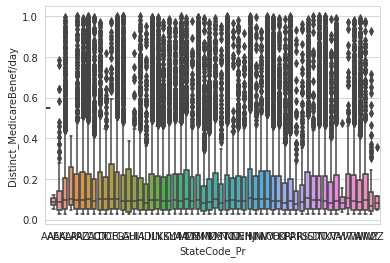

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


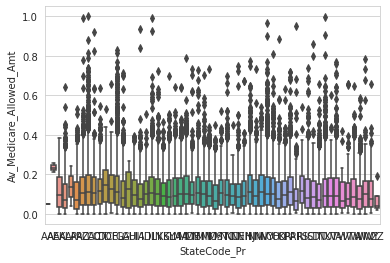

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


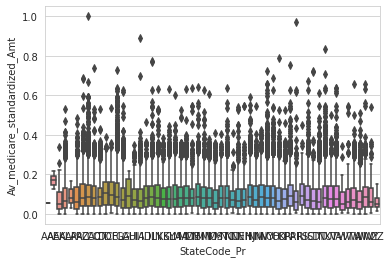

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


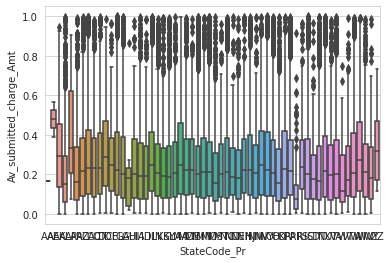

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


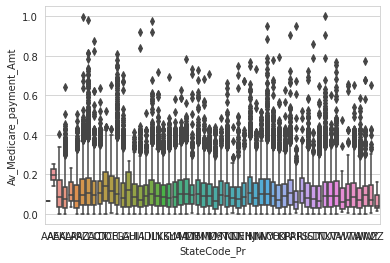

In [45]:
def boxplot ( data , cols , col_x  = 'StateCode_Pr'):
    for col in cols:
        sns.set_style('whitegrid')
        sns.boxplot ( col_x , col, data =data)
        plt.xlabel(col_x)
        plt.ylabel(col)
        plt.show()

boxplot(df_new, num_cols)

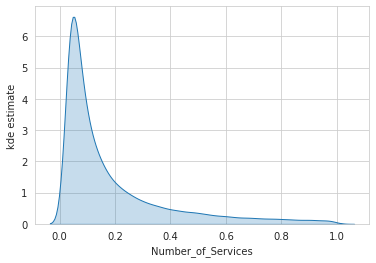

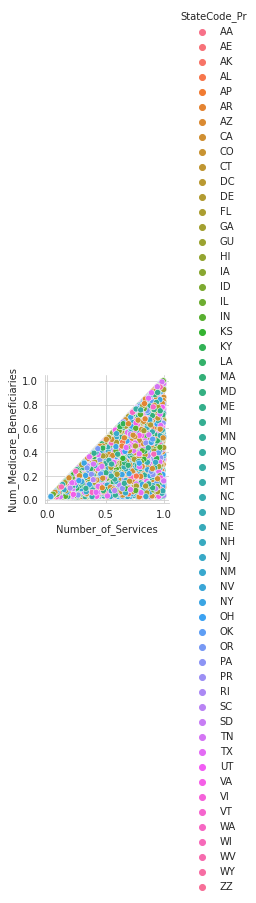

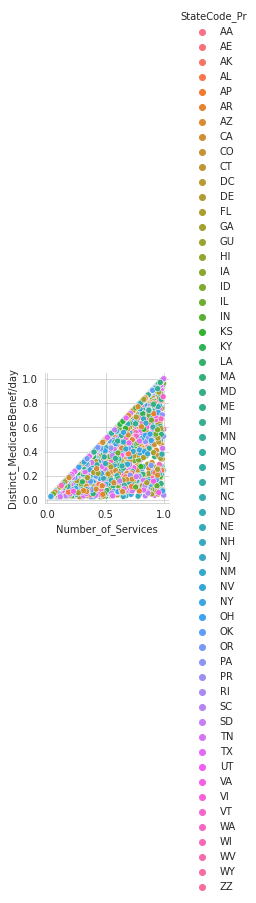

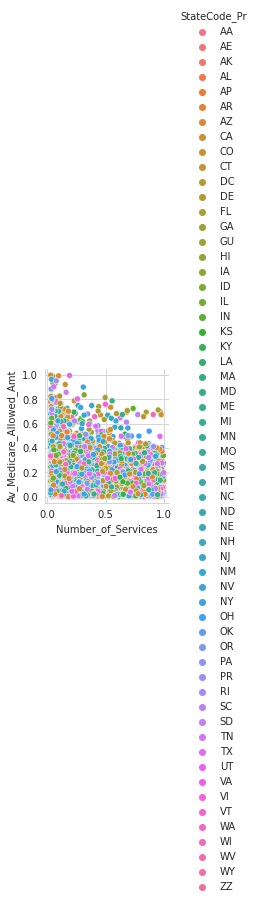

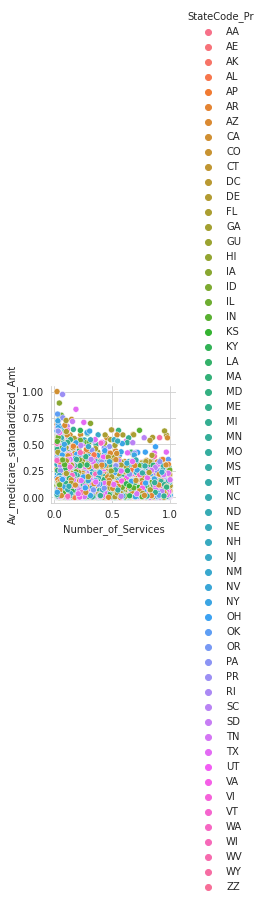

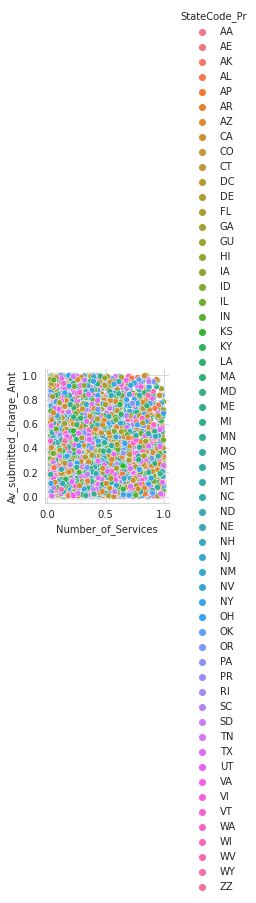

KeyboardInterrupt: ignored

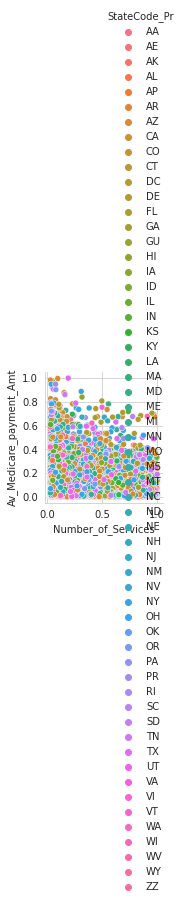

In [46]:
def scatter (data , cols , target= 'StateCode_Pr'):
    for colx in cols:
        for coly in cols:
            if colx == coly:
                sns.kdeplot(data[colx] , shade=True)
                plt.xlabel(colx)
                plt.ylabel('kde estimate')
                plt.show()
            else:
                sns.pairplot(x_vars= colx , y_vars=coly , hue = target , data = data)
                plt.xlabel(colx)
                plt.ylabel(coly)
                plt.show()
scatter(df_new, num_cols)

In [ ]:
def boxplot ( data , cols , col_x  = 'Medicare_Participation_Indicator'):
    for col in cols:
        sns.set_style('whitegrid')
        sns.boxplot ( col_x , col, data =data)
        plt.xlabel(col_x)
        plt.ylabel(col)
        plt.show()

boxplot(df_new, num_cols)

In [ ]:
def scatter (data , cols , target= 'Medicare_Participation_Indicator'):
    for colx in cols:
        for coly in cols:
            if colx == coly:
                sns.kdeplot(data[colx] , shade=True)
                plt.xlabel(colx)
                plt.ylabel('kde estimate')
                plt.show()
            else:
                sns.pairplot(x_vars= colx , y_vars=coly , hue = target , data = data)
                plt.xlabel(colx)
                plt.ylabel(coly)
                plt.show()
scatter(df_new, num_cols)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


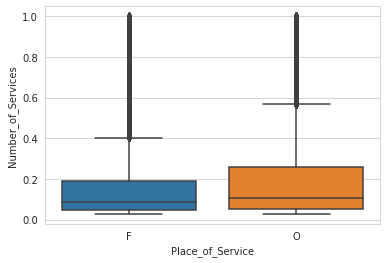

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


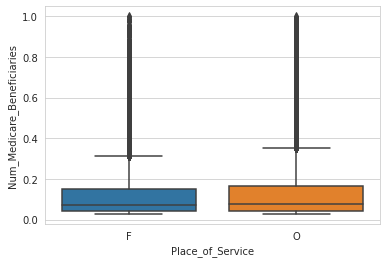

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


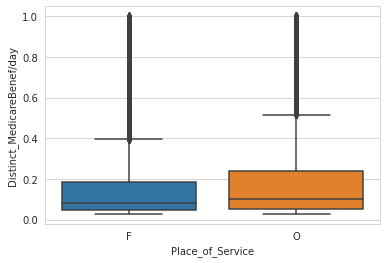

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


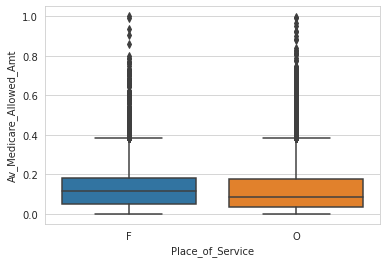

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


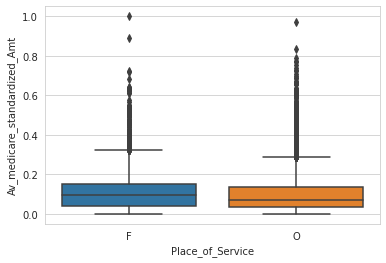

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


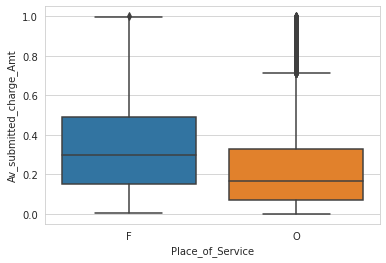

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


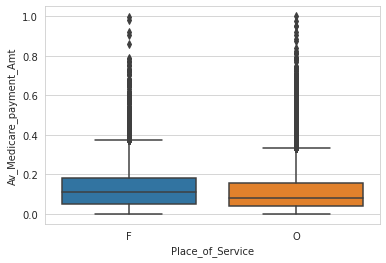

In [47]:
def boxplot ( data , cols , col_x  = 'Place_of_Service'):
    for col in cols:
        sns.set_style('whitegrid')
        sns.boxplot ( col_x , col, data =data)
        plt.xlabel(col_x)
        plt.ylabel(col)
        plt.show()

boxplot(df_new, num_cols)

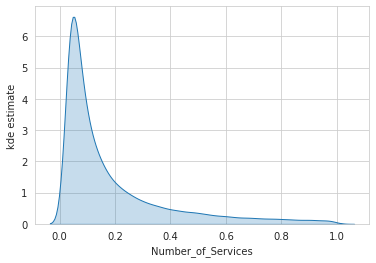

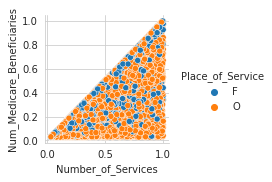

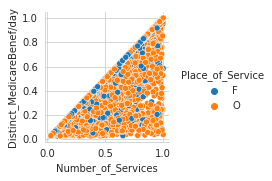

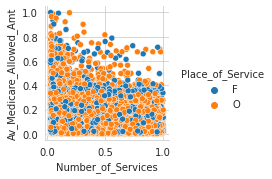

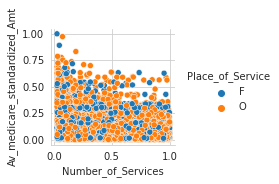

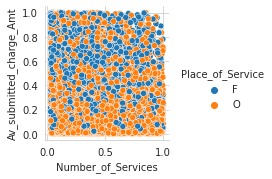

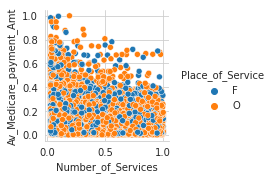

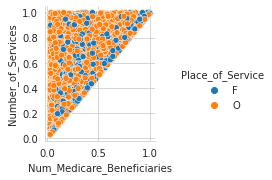

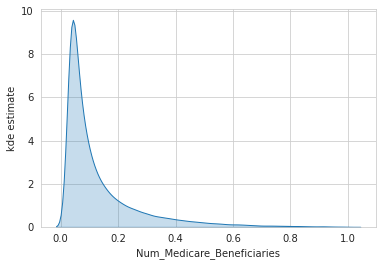

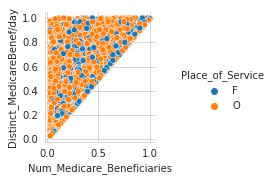

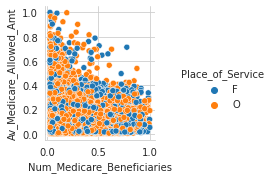

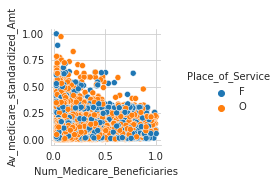

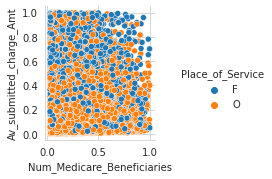

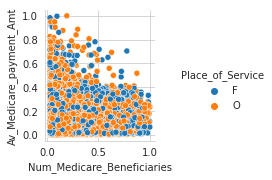

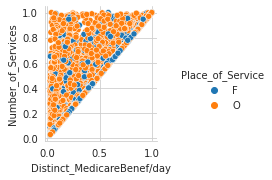

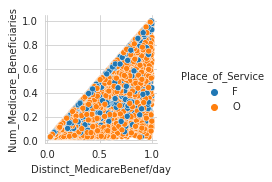

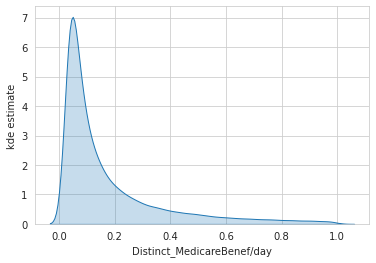

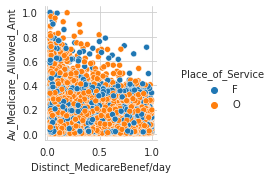

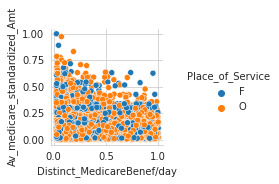

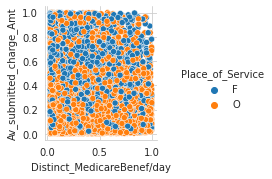

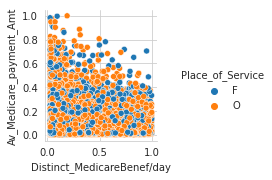

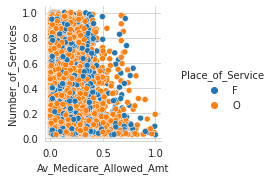

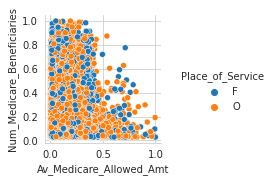

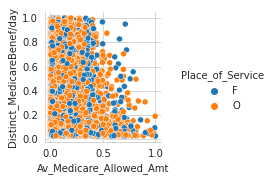

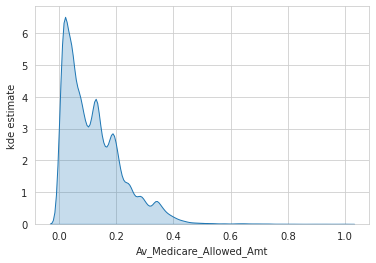

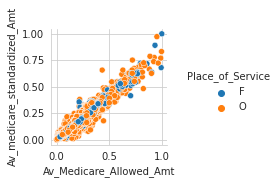

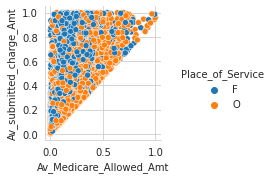

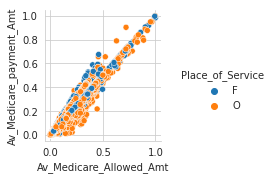

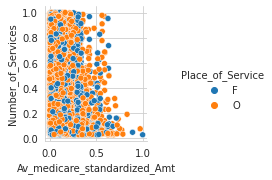

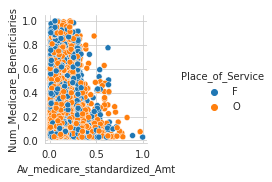

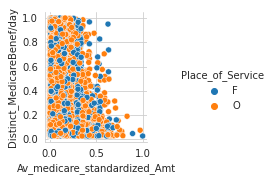

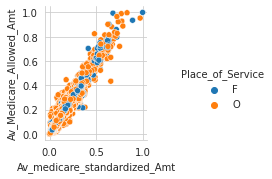

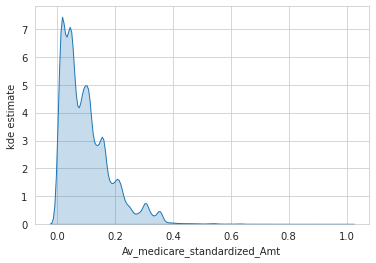

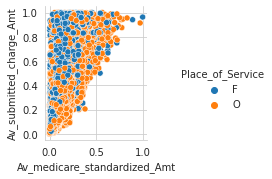

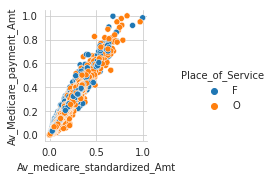

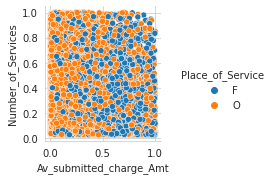

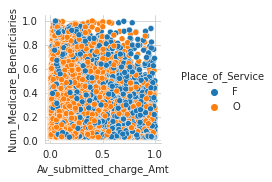

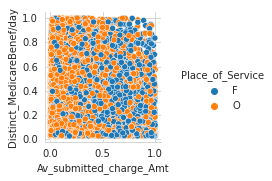

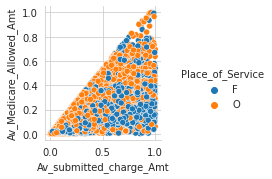

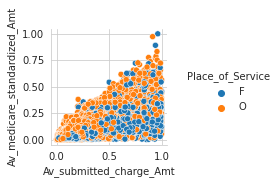

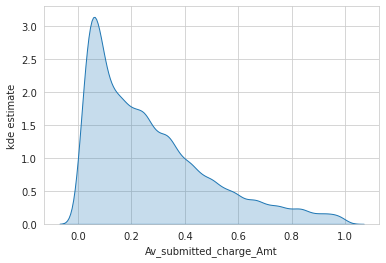

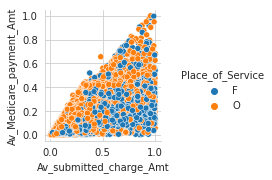

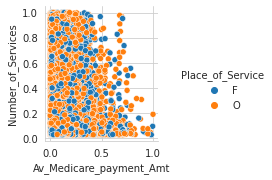

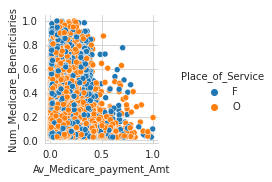

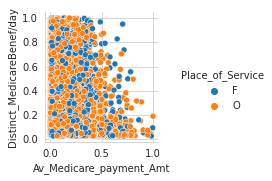

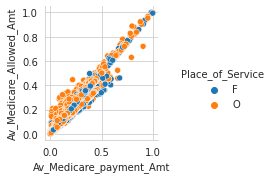

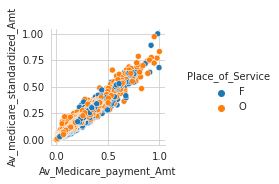

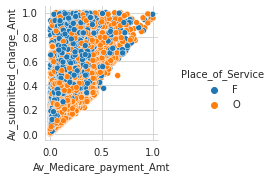

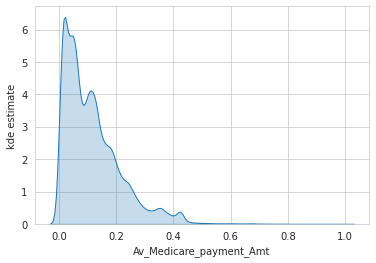

In [48]:
def scatter (data , cols , target= 'Place_of_Service'):
    for colx in cols:
        for coly in cols:
            if colx == coly:
                sns.kdeplot(data[colx] , shade=True)
                plt.xlabel(colx)
                plt.ylabel('kde estimate')
                plt.show()
            else:
                sns.pairplot(x_vars= colx , y_vars=coly , hue = target , data = data)
                plt.xlabel(colx)
                plt.ylabel(coly)
                plt.show()
scatter(df_new, num_cols)

In [ ]:
def scatter (data , cols , target= 'HCPCS_Drug_Indicator'):
    for colx in cols:
        for coly in cols:
            if colx == coly:
                sns.kdeplot(data[colx] , shade=True)
                plt.xlabel(colx)
                plt.ylabel('kde estimate')
                plt.show()
            else:
                sns.pairplot(x_vars= colx , y_vars=coly , hue = target , data = data)
                plt.xlabel(colx)
                plt.ylabel(coly)
                plt.show()
scatter(df_new, num_cols)

# HEAT MAP(CORRELATION AMONGST CATEGORICAL VARIABLES

In [ ]:
cat_cols = ["Gender_Pr","EntityType_Pr","CountryCode_Pr","StateCode_Pr","Medicare_Participation_Indicator","Place_of_Service","HCPCS_Drug_Indicator"]

In [ ]:


df_new1 = pd.get_dummies(df_new, columns = cat_cols)

In [ ]:
df_new1[19]

In [ ]:
def theils_u(x, y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

In [ ]:

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [ ]:
cramers_v()

In [50]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

In [55]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df_new.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

Text(0, 0.5, 'Average Amount')

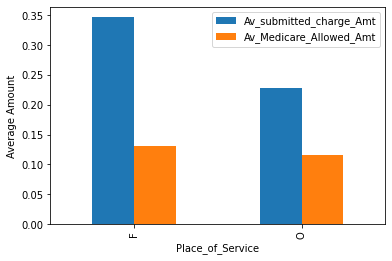

In [179]:

df_new.groupby(['Place_of_Service'])[['Av_submitted_charge_Amt','Av_Medicare_Allowed_Amt']].mean().plot.bar()
plt.ylabel('Average Amount')

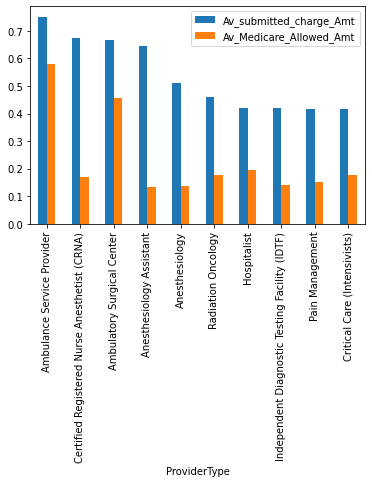

In [205]:
d5=df_new.groupby(['ProviderType'])[['Av_submitted_charge_Amt','Av_Medicare_Allowed_Amt']].mean()
#d5= df_new.groupby(['StateCode_Pr'])[['index']].nunique()
d6=d5.sort_values('Av_submitted_charge_Amt', ascending=False)
d6.head(10).plot.bar()


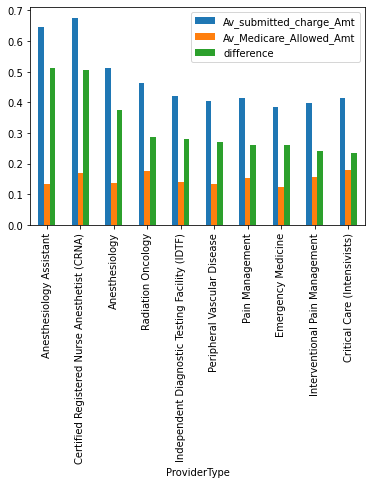

In [217]:
difference=d5['Av_submitted_charge_Amt']-d5['Av_Medicare_Allowed_Amt']
d5['difference']=d5['Av_submitted_charge_Amt']-d5['Av_Medicare_Allowed_Amt']
d7=d5.sort_values('difference',ascending=False)
d7.head(10).plot.bar()

In [213]:
d5

Av_submitted_charge_Amt  Av_Medicare_Allowed_Amt
ProviderType                                                                                      
Addiction Medicine                                               0.319298                 0.160195
Advanced Heart Failure and Transplant Cardiology                 0.181783                 0.124816
All Other Suppliers                                              0.083065                 0.085868
Allergy/ Immunology                                              0.222533                 0.127917
Ambulance Service Provider                                       0.751061                 0.581462
...                                                                   ...                      ...
Surgical Oncology                                                0.370990                 0.161974
Thoracic Surgery                                                 0.402472                 0.188925
Undefined Physician type                                         0.403440                 0.190936
Urology                                                          0.337973                 0.140836
Vascular Surgery                                                 0.372585                 0.155005

[89 rows x 2 columns]

Text(0, 0.5, 'Provider Type')

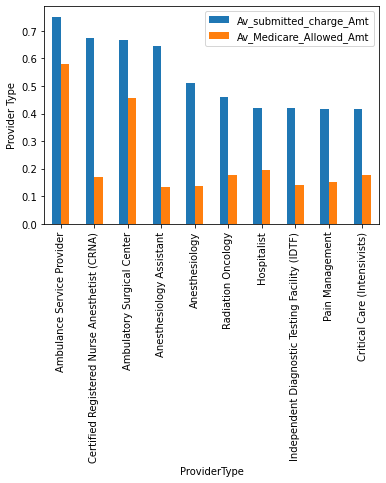

In [212]:
d5=df_new.groupby(['ProviderType'])[['Av_submitted_charge_Amt','Av_Medicare_Allowed_Amt']].mean()
#d5= df_new.groupby(['StateCode_Pr'])[['index']].nunique()
d6=d5.sort_values(['Av_submitted_charge_Amt','Av_Medicare_Allowed_Amt'], ascending=False)
d6.head(10).plot.bar()
plt.ylabel('Provider Type')

In [ ]:
my_tab = pd.crosstab(index = df_new["NIP"],  # Make a crosstab
                              columns="count")      # Name the count column

my_tab.plot.bar()

In [124]:
df_new.columns

Index(['index', 'NIP', 'LastName_Provider', 'FirstName_Provider',
       'MidInit_Provider', 'Credentials_Pr', 'Gender_Pr', 'EntityType_Pr',
       'StreetAddress1', 'StreetAddress2', 'City_Provider', 'ZipCode_Pr',
       'StateCode_Pr', 'CountryCode_Pr', 'ProviderType',
       'Medicare_Participation_Indicator', 'Place_of_Service', 'HCPCS_Code',
       'HCPCS_Description', 'HCPCS_Drug_Indicator', 'Number_of_Services',
       'Num_Medicare_Beneficiaries', 'Distinct_MedicareBenef/day',
       'Av_Medicare_Allowed_Amt', 'Av_submitted_charge_Amt',
       'Av_Medicare_payment_Amt', 'Av_medicare_standardized_Amt'],
      dtype='object')

In [132]:
df_new[['StateCode_Pr','index']].value_counts()

StateCode_Pr  index  
ZZ            6049810    1
IN            6439827    1
              6413303    1
              6416639    1
              6423985    1
                        ..
NY            6872556    1
              6873298    1
              6873566    1
              6874065    1
AA            9102959    1
Length: 80522, dtype: int64

In [196]:
df_new.shape

(80522, 27)

Text(0, 0.5, 'Number of Providers')

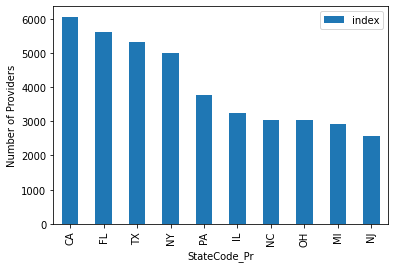

In [194]:
d5= df_new.groupby(['StateCode_Pr'])[['index']].nunique()
d6=d5.sort_values('index', ascending=False)
d6.head(10).plot.bar()
plt.ylabel('Number of Providers')
#d5[(d5['StateCode_Pr']) & (d5['index'].max())]

In [199]:
d6

index
StateCode_Pr       
CA             6067
FL             5620
TX             5329
NY             4999
PA             3781
IL             3256
NC             3049
OH             3026
MI             2913
NJ             2569
MA             2311
GA             2279
VA             2245
TN             2193
IN             1815
WA             1691
MO             1659
MD             1658
AZ             1573
WI             1495
AL             1466
KY             1395
MN             1378
SC             1363
LA             1231
CT             1149
CO             1146
OK              998
IA              958
KS              900
AR              900
OR              893
MS              862
NE              648
UT              551
WV              544
NV              538
NH              442
ME              379
ID              360
NM              347
MT              298
RI              296
DE              274
PR              268
SD              266
DC              221
HI              212
ND              201
VT              199
WY              142
AK              129
VI               16
GU               13
ZZ                5
AP                3
AE                2
AA                1

Text(0, 0.5, 'Number of Providers with NPI')

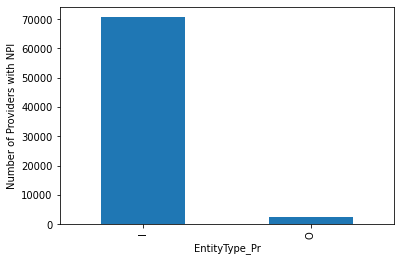

In [163]:
df_new.groupby(['EntityType_Pr'])['NIP'].nunique().plot.bar()
plt.ylabel('Number of Providers with NPI')

In [169]:
df_new.groupby(['EntityType_Pr'])['NIP'].nunique()

EntityType_Pr
I    70688
O     2510
Name: NIP, dtype: int64

In [175]:
df_new[['index','NIP']].duplicated().sum()

0

In [ ]:
df_new.groupby